<a href="https://colab.research.google.com/github/nahyunryou/ML_Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/ml_project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ml_project/test.csv')



동일인물임을 결정하는 5가지 변수
- gender : 성별
- income_total : 연간 소득
- income_type : 소득 분류
- DAYS_BIRTH : 출생일
- DAYS_EMPLOYED : 업무 시작일

이 5가지의 변수가 동일 하다면 동일인물로 간주

In [5]:
# 성별, 연간 소득, 소득 분류, 출생일, 업무 시작일의 변수를 하나로 만들어 줌 (추후 동일 인물 파악에 사용)

train['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(train['gender'],train['income_total'],train['income_type'],train['DAYS_BIRTH'],train['DAYS_EMPLOYED'])]
test['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(test['gender'],test['income_total'],test['income_type'],test['DAYS_BIRTH'],test['DAYS_EMPLOYED'])]

print(f"train set 중복데이터가 아닌 사람의 수 : {sum(train['identity'].value_counts()==1)}명")
print(f"test set 중복데이터가 아닌 사람의 수 : {sum(test['identity'].value_counts()==1)}명")
print('-'*60)
print(f"train set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(train['identity'].value_counts()>=2)}명")
print(f"test set 동일인물의 중복데이터로 추정되는 사람의 수 : {sum(test['identity'].value_counts()>=2)}명")

train set 중복데이터가 아닌 사람의 수 : 3209명
test set 중복데이터가 아닌 사람의 수 : 3103명
------------------------------------------------------------
train set 동일인물의 중복데이터로 추정되는 사람의 수 : 5518명
test set 동일인물의 중복데이터로 추정되는 사람의 수 : 2468명


동일인물로 추정되는 중복데이터

In [6]:
identity_counts = train['identity'].value_counts()
print(identity_counts)
dup_case_1 = identity_counts.index[0]

F297000.0Commercial associate-15519-3234    35
F157500.0State servant-12676-1350           24
M225000.0Working-16768-3088                 24
M112500.0Working-9952-1613                  21
F225000.0Pensioner-22976365243              20
                                            ..
M90000.0Pensioner-21954365243                1
M112500.0Commercial associate-9552-1567      1
F108000.0Commercial associate-13877-1021     1
F157500.0Working-14880-773                   1
F81000.0Working-19569-1013                   1
Name: identity, Length: 8727, dtype: int64


In [7]:
# 동일인물로 추정되는 중복데이터 예시
train[train['identity']==dup_case_1]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
130,130,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-1.0,0.0,F297000.0Commercial associate-15519-3234
647,647,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-15.0,1.0,F297000.0Commercial associate-15519-3234
717,717,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-36.0,0.0,F297000.0Commercial associate-15519-3234
888,888,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-3.0,0.0,F297000.0Commercial associate-15519-3234
2927,2927,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-12.0,0.0,F297000.0Commercial associate-15519-3234
3739,3739,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-18.0,1.0,F297000.0Commercial associate-15519-3234
5168,5168,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-34.0,1.0,F297000.0Commercial associate-15519-3234
7847,7847,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-21.0,1.0,F297000.0Commercial associate-15519-3234
9062,9062,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-23.0,1.0,F297000.0Commercial associate-15519-3234
9074,9074,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,...,-3234,1,0,0,0,Laborers,1.0,-7.0,1.0,F297000.0Commercial associate-15519-3234


```begin_month``` 변수 만이 다르며 이에 따라 ```credit```값이 차이가 나는 것을 볼 수 있음

**이는 동일인물에 대해 신용도 측정을 여러 시기에 걸쳐 실시한 데이터**


--- 

## TRAIN, TEST 데이터 셋에 포함된 중복데이터 현황

In [8]:
print(f'shape of train set  : {train.shape}')
print(f'shape of test set  : {test.shape}')

shape of train set  : (26457, 21)
shape of test set  : (10000, 20)



- train data 에는 (3209 (중복 아닌 사람) + 5518 (중복인 사람)) 8727 명의 신용도 데이터
- test data 에는 (3103 (중복 아닌 사람) + 2468 (중복인 사람)) 5571 명의 신용도 데이터




## 동일 인물에 대한 시간별 신용도 변화 추이

train 데이터 속 35건의 중복데이터가 존재한 동일인물의 시간별 신용도 변화 추이를 라인그래프 시각화

In [9]:
# 직관적 이해를 돕기위해 부호를 반대로 취해줌
# 예를 들어 begin_month가 12이면 카드 발급받은지 12개월이 지난 시점에 조사한 신용도라고 해석이 가능

train['begin_month'] = -train['begin_month']
test['begin_month'] = -test['begin_month']

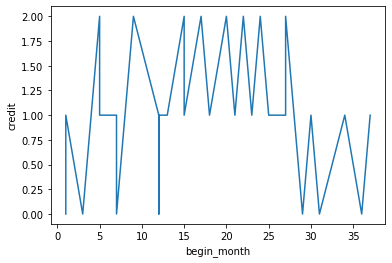

In [10]:
dup_1 = train[train['identity']==dup_case_1]
dup_1 = dup_1.sort_values('begin_month')

plt.plot(dup_1['begin_month'],dup_1['credit'],'-')

plt.xlabel('begin_month')
plt.ylabel('credit')

plt.show()

라인그래프의 ```x```축에서 0으로 가까울 수록 카드 발급 시기와 가깝고 오른쪽으로 갈수록 카드 발급 후 시간 흐름

라인그래프를 살펴보면 시기별로 신용도가 자주 변하는 것을 알 수 있음